# PyQuanta


Suppose we describe the evolution of a free quantum particle in one dimension with periodic boundary conditions. The system will be described by the equation:

$$\text i \frac{\partial\psi}{\partial t} = -\frac{1}{2}\frac{\partial^2\psi}{\partial x^2}.$$



The standard approach for numerical simulations is to perform numerical steps as:

$$\psi(t+\Delta t) = ifft\circ \mathbb E_k \circ fft\big(\psi(t)\big),$$

where $fft$ and $ifft$ are standard Fourier Transform functions, and $\mathbb E_k$ is defined as:

$$\mathbb E_k = \exp\big(-\text i k^2\Delta t\big)$$

with $k$ being the wave number. In the terms of Python script:

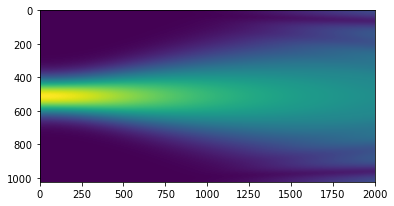

In [2]:
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt

Nx = 1024
Lx = 10.

dt = 0.001

dx = Lx/Nx

X = np.linspace(-Lx/2, Lx/2 , Nx)
tab = np.exp(-X**2)

Kx = (np.arange(Nx) - np.append(np.zeros(Nx/2), np.ones(Nx/2)*Nx))
Kx = 2j*np.pi/Lx*Kx
K2 = np.exp(-1j*Kx**2*dt/2)

Tab = np.zeros((2000,Nx))

for i in range(2000):
    tab = ifft(K2*fft(tab))
    Tab[i] = np.abs(tab)    
    
plt.imshow(Tab.T)
plt.show()

Our main problem revolves around describtion of $\psi$ function in the polar representation of complex function. To properly start this describtion, lets first describe $\psi$ as the sum of two real functions:

$$\psi(x,t) = f(x,t)+\text ig(x,t).$$

In this approach main equation before takes the form:

$$\text i \partial_t f - \partial_t g = -\frac12\partial_x^2f - \text i\frac12\partial_x^2g$$

Which can be separated into two entangled equations:

$$\partial_t f = -\frac12\partial_x^2g$$
$$\partial_t g = \frac 12\partial_x^2f$$

Now we have more advanced problem - how to differentiate those function without involving imaginary parts into values? We can either stick to using $fft$ for differentiating or use different method.

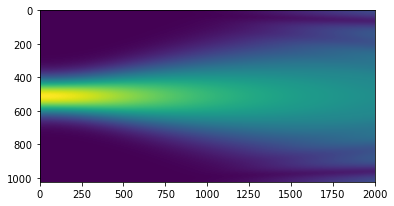

In [21]:
import numpy as np
from numpy.linalg import norm
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt

Nx = 1024
Lx = 10.
dt = 0.001

X = np.linspace(-Lx/2, Lx/2 , Nx)
tab = np.exp(-X**2)*1j

Kx = (np.arange(Nx) - np.append(np.zeros(Nx/2), np.ones(Nx/2)*Nx))
Kx = 2j*np.pi/Lx*Kx
K2 = Kx**2

Tab = np.zeros((2000,Nx))

f = np.real(tab)
g = np.zeros(Nx)

def d(fun):
    return (-np.roll(f,-2)+8*np.roll(f,-1)-8*np.roll(f,1)+np.roll(f,2))/(12*Lx)*Nx


for i in range(2000):
    tab = ifft(np.exp(-1j*K2*dt/2)*fft(tab))
    tab /= norm(tab)
    Tab[i] = np.abs(tab)
    
plt.imshow(Tab.T)
plt.show()

The problem rises when we want to describe our $\psi$ function in polar coordinates:

$$\psi(x,t) = R(x,t)\exp\big(\text i \theta(x,t)\big).$$

